# WeatherPy - Aaron Wollman
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
sample_size = 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Function to call OpenWeatherMap's API
weather_baseurl = "http://api.openweathermap.org/data/2.5/weather?"

def get_city_weather(city):
    weather_params = {
        "appid" : weather_api_key,
        "q" : city,
        "units" : "Imperial"
    }
    
    weather_response = requests.get(weather_baseurl, params = weather_params)
    return weather_response.json()

In [4]:
# Helpers to save data from JSON to an object
class City_Weather_Columns:
    city = "City"
    lat = "Lat"
    lng = "Lng"
    max_temp = "Max Temp"
    humidity = "Humidity"
    cloudiness = "Cloudiness"
    wind_speed = "Wind Speed"
    country = "country"
    date = "Date"
       
def process_weather_json(json):
    return {
        City_Weather_Columns.city : json["name"],
        City_Weather_Columns.lat : json["coord"]["lat"],
        City_Weather_Columns.lng : json["coord"]["lon"],
        City_Weather_Columns.max_temp : json["main"]["temp_max"],
        City_Weather_Columns.humidity : json["main"]["humidity"],
        City_Weather_Columns.cloudiness : json["clouds"]["all"],
        City_Weather_Columns.wind_speed : json["wind"]["speed"],
        City_Weather_Columns.country : json["sys"]["country"],
        City_Weather_Columns.date : json["dt"]
    }

In [5]:
# Load the data from OpenWeatherMap into city_weather_list
print("Beginning Data Retrieval")
print("-----------------------------")

record_num = 1;
set_num = 1;
city_weather_list = []
for city in cities:
    
    try:
        city_weather_json = get_city_weather(city)     
        city_weather = process_weather_json(city_weather_json)
        city_name = city_weather[City_Weather_Columns.city]
        print(f"Processing Record {record_num} of Set {set_num} | {city_name}")
        city_weather_list.append(city_weather)
    except:
        print("City not found. Skipping...")
    
    # Keep Record Count; Sets of 50
    record_num += 1
    if(record_num > 50):
        set_num += 1
        record_num = 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | Vardø
Processing Record 3 of Set 1 | Punta Arenas
Processing Record 4 of Set 1 | Hofn
Processing Record 5 of Set 1 | Busselton
Processing Record 6 of Set 1 | Fuzhou
Processing Record 7 of Set 1 | Pacific Grove
Processing Record 8 of Set 1 | Mandlā
Processing Record 9 of Set 1 | Albany
Processing Record 10 of Set 1 | Nanortalik
Processing Record 11 of Set 1 | Martapura
Processing Record 12 of Set 1 | Matara
Processing Record 13 of Set 1 | Vaini
Processing Record 14 of Set 1 | Esperance
Processing Record 15 of Set 1 | Tiksi
Processing Record 16 of Set 1 | George Town
Processing Record 17 of Set 1 | Zhezkazgan
Processing Record 18 of Set 1 | Saskylakh
Processing Record 19 of Set 1 | Ushuaia
Processing Record 20 of Set 1 | Palmer
Processing Record 21 of Set 1 | Nuuk
Processing Record 22 of Set 1 | Port Blair
Processing Record 23 of Set 1 | Hobart
Processing Record 24 of Set 1 |

Processing Record 5 of Set 5 | El Oro
Processing Record 6 of Set 5 | San Vicente
City not found. Skipping...
Processing Record 8 of Set 5 | San Juan
Processing Record 9 of Set 5 | Jimma
Processing Record 10 of Set 5 | Sarakhs
Processing Record 11 of Set 5 | eMkhomazi
Processing Record 12 of Set 5 | Calabozo
Processing Record 13 of Set 5 | Tommot
Processing Record 14 of Set 5 | Wagar
Processing Record 15 of Set 5 | Oranjemund
Processing Record 16 of Set 5 | Awjilah
Processing Record 17 of Set 5 | La Ronge
Processing Record 18 of Set 5 | Bethel
Processing Record 19 of Set 5 | Sol'tsy
Processing Record 20 of Set 5 | Saint-Félicien
Processing Record 21 of Set 5 | Dryden
Processing Record 22 of Set 5 | Cidreira
City not found. Skipping...
Processing Record 24 of Set 5 | Kautokeino
Processing Record 25 of Set 5 | Margate
Processing Record 26 of Set 5 | Saint George
Processing Record 27 of Set 5 | São Borja
Processing Record 28 of Set 5 | Zhirnovsk
Processing Record 29 of Set 5 | Grão Mogol
P

City not found. Skipping...
Processing Record 12 of Set 9 | Mildura
Processing Record 13 of Set 9 | Aksu
Processing Record 14 of Set 9 | Severomuysk
Processing Record 15 of Set 9 | Preeceville
Processing Record 16 of Set 9 | Port Hedland
City not found. Skipping...
Processing Record 18 of Set 9 | Jalu
Processing Record 19 of Set 9 | Isfahan
Processing Record 20 of Set 9 | Sakakah
City not found. Skipping...
Processing Record 22 of Set 9 | Kuzhithurai
Processing Record 23 of Set 9 | Luganville
Processing Record 24 of Set 9 | Agirish
Processing Record 25 of Set 9 | San Andrés
Processing Record 26 of Set 9 | Rawson
Processing Record 27 of Set 9 | Vila do Maio
Processing Record 28 of Set 9 | Kindu
Processing Record 29 of Set 9 | Siderno
Processing Record 30 of Set 9 | Southbridge
Processing Record 31 of Set 9 | Hay River
Processing Record 32 of Set 9 | Kamaishi
Processing Record 33 of Set 9 | Linjiang
Processing Record 34 of Set 9 | Beckley
Processing Record 35 of Set 9 | Tucumã
Processing

City not found. Skipping...
Processing Record 13 of Set 13 | Piaçabuçu
Processing Record 14 of Set 13 | Dalnegorsk
Processing Record 15 of Set 13 | Montepuez
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert to DataFrame
city_weather_df = pd.DataFrame(city_weather_list)
city_weather_df = city_weather_df.dropna()
city_weather_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
country       563
Date          563
dtype: int64

In [7]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,Date
0,Vardø,70.37,31.11,57.20,93,12,16.11,NO,1595541622
1,Punta Arenas,-53.15,-70.92,39.20,80,75,16.11,CL,1595541623
2,Hofn,64.25,-15.21,50.07,70,98,7.07,IS,1595541623
3,Busselton,-33.65,115.33,42.01,77,0,4.72,AU,1595541612
4,Fuzhou,26.06,119.31,84.20,79,62,8.95,CN,1595541401


In [8]:
# Save to CSV
city_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.926465,18.473819,68.485187,72.444050,51.071048,7.604192,1.595542e+09
std,33.131343,89.038475,14.601254,18.654328,38.174379,5.170210,6.201352e+01
min,-54.800000,-175.200000,24.800000,12.000000,0.000000,0.270000,1.595541e+09
25%,-4.035000,-62.375000,57.200000,62.000000,7.000000,3.800000,1.595542e+09
50%,25.050000,25.570000,70.290000,76.000000,58.000000,6.490000,1.595542e+09
75%,48.810000,92.070000,79.495000,87.000000,88.000000,10.170000,1.595542e+09
max,78.220000,178.420000,100.000000,100.000000,100.000000,29.970000,1.595542e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
over_100_humid = city_weather_df.loc[city_weather_df[City_Weather_Columns.humidity] > 100].index
over_100_humid

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(over_100_humid)
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.926465,18.473819,68.485187,72.444050,51.071048,7.604192,1.595542e+09
std,33.131343,89.038475,14.601254,18.654328,38.174379,5.170210,6.201352e+01
min,-54.800000,-175.200000,24.800000,12.000000,0.000000,0.270000,1.595541e+09
25%,-4.035000,-62.375000,57.200000,62.000000,7.000000,3.800000,1.595542e+09
50%,25.050000,25.570000,70.290000,76.000000,58.000000,6.490000,1.595542e+09
75%,48.810000,92.070000,79.495000,87.000000,88.000000,10.170000,1.595542e+09
max,78.220000,178.420000,100.000000,100.000000,100.000000,29.970000,1.595542e+09


In [12]:
# Extract relevant fields from the data frame
final_columns = [City_Weather_Columns.lat, 
                 City_Weather_Columns.lng,
                 City_Weather_Columns.max_temp, 
                 City_Weather_Columns.humidity, 
                 City_Weather_Columns.cloudiness,
                 City_Weather_Columns.wind_speed]
final_city_data = clean_city_data[final_columns]
final_city_data.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,70.37,31.11,57.20,93,12,16.11
1,-53.15,-70.92,39.20,80,75,16.11
2,64.25,-15.21,50.07,70,98,7.07
3,-33.65,115.33,42.01,77,0,4.72
4,26.06,119.31,84.20,79,62,8.95


In [13]:
# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
def savefig(filename):
    plt.savefig(f"images/{filename}.png")

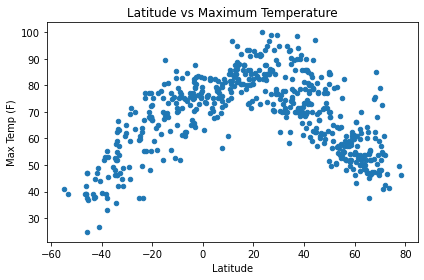

In [15]:
def plot_lat_v_temp(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.max_temp)
    plt.title("Latitude vs Maximum Temperature")
    plt.ylabel("Max Temp (F)")
    plt.xlabel("Latitude")

plot_lat_v_temp(final_city_data)
plt.tight_layout()
savefig("lat_v_temp")
plt.show()

## Latitude vs. Humidity Plot

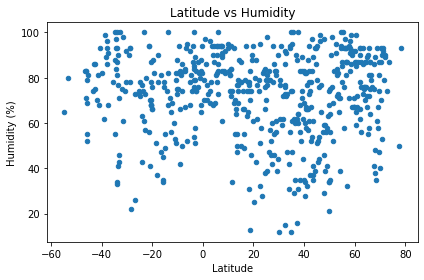

In [16]:
def plot_lat_v_humid(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.humidity)
    plt.title("Latitude vs Humidity")
    plt.ylabel("Humidity (%)")
    plt.xlabel("Latitude")

plot_lat_v_humid(final_city_data)
plt.tight_layout()
savefig("lat_v_humid")
plt.show()

## Latitude vs. Cloudiness Plot

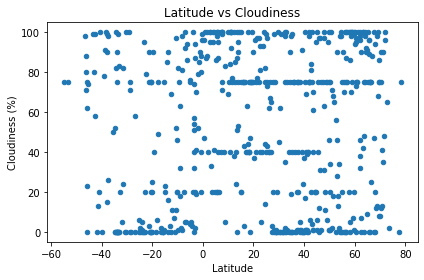

In [17]:
def plot_lat_v_cloud(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.cloudiness)
    plt.title("Latitude vs Cloudiness")
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")

plot_lat_v_cloud(final_city_data)
plt.tight_layout()
savefig("lat_v_cloud")
plt.show()

## Latitude vs. Wind Speed Plot

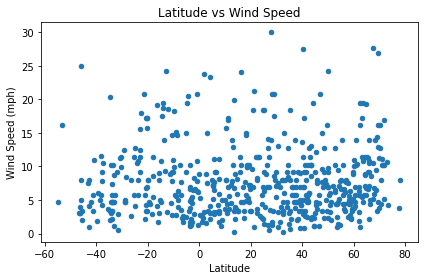

In [18]:
def plot_lat_v_wind(df):
    df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.wind_speed)
    plt.title("Latitude vs Wind Speed")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")

plot_lat_v_wind(final_city_data)
plt.tight_layout()
savefig("lat_v_wind")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_lin_reg(dataframe, x_col, y_col):
    x_values = dataframe[x_col]
    y_values = dataframe[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_plot, = plt.plot(x_values, regress_values, "r-", label=equation)
    plt.legend(handles=[regress_plot], loc="best")
    print(f"The r-squared value is {rvalue * rvalue}")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] >= 0]
north_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,70.37,31.11,57.20,93,12,16.11
2,64.25,-15.21,50.07,70,98,7.07
4,26.06,119.31,84.20,79,62,8.95
5,36.62,-121.92,70.00,60,40,9.17
6,22.60,80.38,73.02,95,81,3.65


In [21]:
south_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] < 0]
south_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,-53.15,-70.92,39.20,80,75,16.11
3,-33.65,115.33,42.01,77,0,4.72
9,-3.42,114.85,75.20,100,40,1.12
11,-21.20,-175.20,69.80,94,75,5.82
12,-33.87,121.90,46.40,87,75,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.48563170339038547


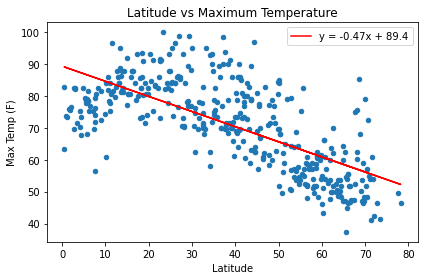

In [22]:
plot_lat_v_temp(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("north_lat_v_temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6599733290822962


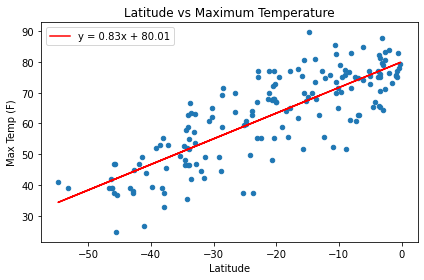

In [23]:
plot_lat_v_temp(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("south_lat_v_temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 7.414696139305058e-05


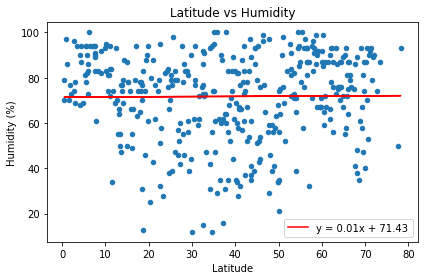

In [24]:
plot_lat_v_humid(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("north_lat_v_humid")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.00028509282698231604


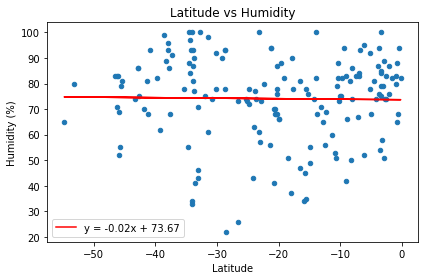

In [25]:
plot_lat_v_humid(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("south_lat_v_humid")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.009272932876234798


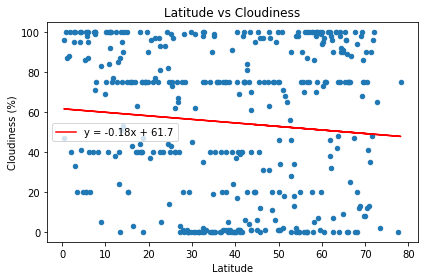

In [26]:
plot_lat_v_cloud(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("north_lat_v_cloud")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0016129352951382138


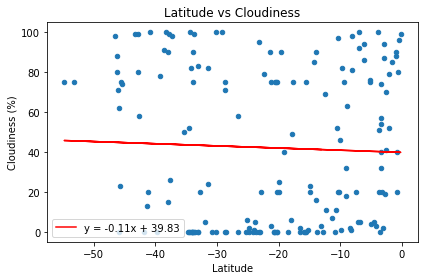

In [27]:
plot_lat_v_cloud(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("south_lat_v_cloud")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.006209456694655463


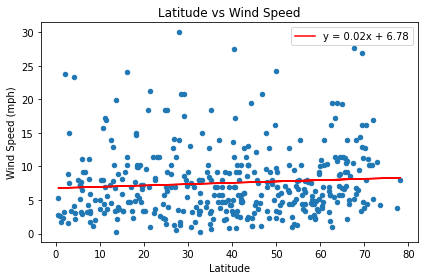

In [28]:
plot_lat_v_wind(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
savefig("north_lat_v_wind")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0065832266965211725


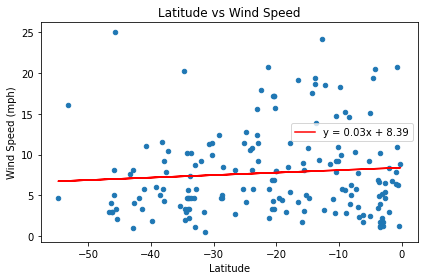

In [29]:
plot_lat_v_wind(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
savefig("south_lat_v_wind")
plt.show()